In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (14,7)
pd.set_option('display.max_rows', None)

In [2]:
#Loading Housing dataset

housing_df = pd.read_csv(r'C:\Users\Dewoyin\Documents\excel datasets for python analysis\Housing dataset\train.csv') 
Data_df =  housing_df.copy()

In [3]:
Data_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Data cleaning;to remove unwanted variables, values and also to get rid of irregularities
# checking for missing values

null_data = Data_df.isnull().sum().sort_values(ascending = False).head(20)
mean_data = Data_df.isnull().mean()
missing_df = pd.DataFrame({'mean': mean_data, 'missing_data': null_data})
missing_df.sort_values(by = 'mean', ascending = False).head(20)




,mean,missing_data
PoolQC,0.995205,1453.0
MiscFeature,0.963014,1406.0
Alley,0.937671,1369.0
Fence,0.807534,1179.0
FireplaceQu,0.472603,690.0
LotFrontage,0.177397,259.0
GarageFinish,0.055479,81.0
GarageQual,0.055479,81.0
GarageType,0.055479,81.0
GarageYrBlt,0.055479,81.0


In [5]:
# dealing with missing data
Data_df.drop(Data_df.columns[Data_df.isnull().mean()>0.005], axis = 1, inplace = True)


Data_df.isnull().sum().sort_values(ascending= False)[:20]


Electrical      1
Fireplaces      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
Id              0
CentralAir      0
GarageArea      0
PavedDrive      0
WoodDeckSF      0
dtype: int64

In [6]:
# Electrical column has only one missing data. Fill the missing value with the column's mode; the highest occuring value in the data
Data_df['Electrical'].fillna(Data_df['Electrical'].mode()[0], inplace = True)



In [7]:
#checking for missing value in electrical column
Data_df['Electrical'].isnull().sum()

0

In [8]:
#checking the data set for any missing value left

Data_df.isnull().sum().sort_values(ascending = False)[:20]

Id              0
Fireplaces      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
GarageCars      0
CentralAir      0
GarageArea      0
PavedDrive      0
WoodDeckSF      0
dtype: int64

In [9]:
# columns present in our data set

Data_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [10]:
# Our data is clean, so we check the descriptive analysis summary

Data_df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
Data_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'SalePrice distribution')

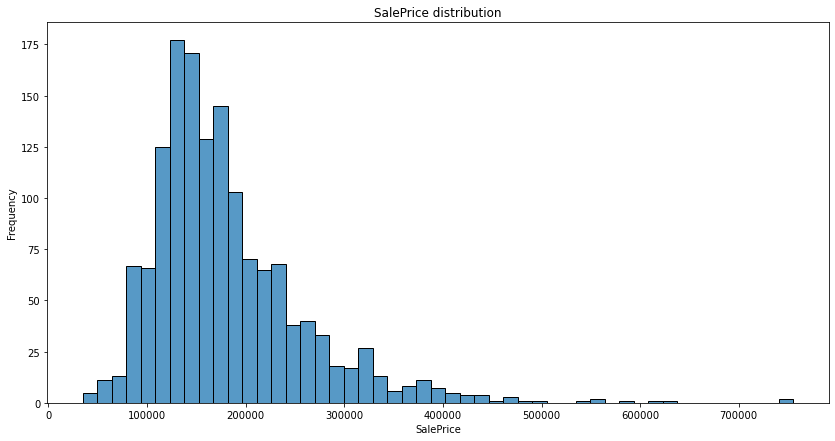

In [12]:
# univariate analysis; analyze data of just one variable

sns.histplot(Data_df.SalePrice)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')



<AxesSubplot:>

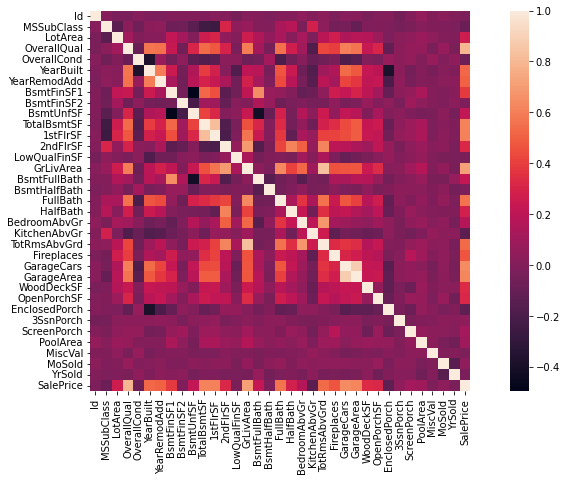

In [13]:
#correlation between variables

corr_data = Data_df.corr()

ax, fig = plt.subplots(figsize = (14,7))

sns.heatmap(corr_data, square = True)

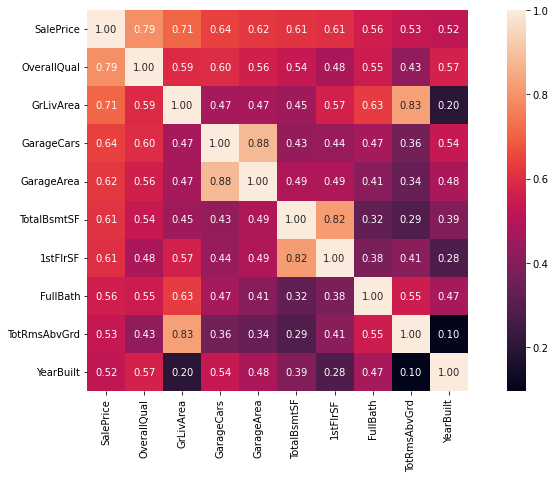

In [14]:
#Saleprice correlation matrix

num = 10    #No of variables for the heatmap
vars = corr_data.nlargest(num, 'SalePrice')['SalePrice'].index
df = np.corrcoef(Data_df[vars].values.T)
heatmap = sns.heatmap(df, annot =True, square = True, fmt = '.2f', xticklabels = vars, yticklabels = vars)





Text(0.5, 1.0, 'SalePrice VS GrLivArea')

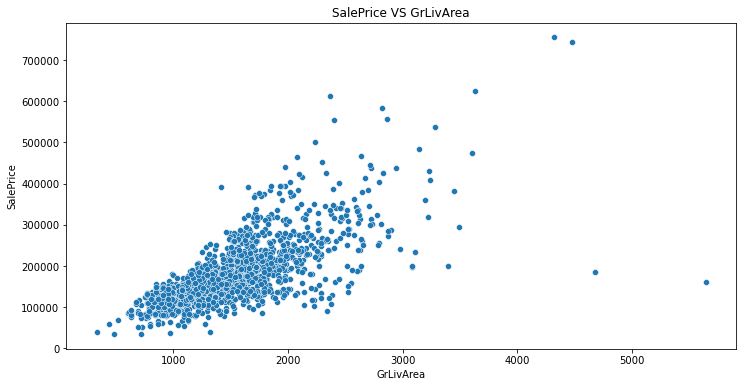

In [15]:
#two variables analysis: Bivariate
# Find out how a variable affects the other, their relationship or correlation
#Saleprice vs GlivArea

F, ax = plt.subplots(figsize =(12,6))
sns.scatterplot(data = Data_df, x = 'GrLivArea', y = 'SalePrice').set_title('SalePrice VS GrLivArea')

Text(0.5, 1.0, 'SalePrice VS TotalBsmtSF')

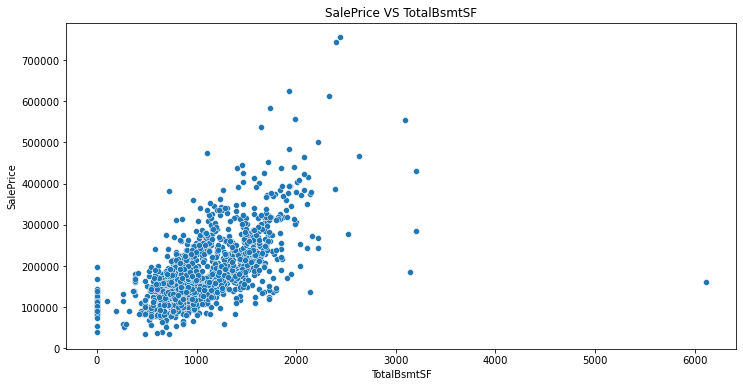

In [16]:
# How the TotalBsmtSF correspond to the Sale price

F, ax = plt.subplots(figsize =(12,6))
sns.scatterplot(data = Data_df, x = 'TotalBsmtSF', y = 'SalePrice').set_title('SalePrice VS TotalBsmtSF')

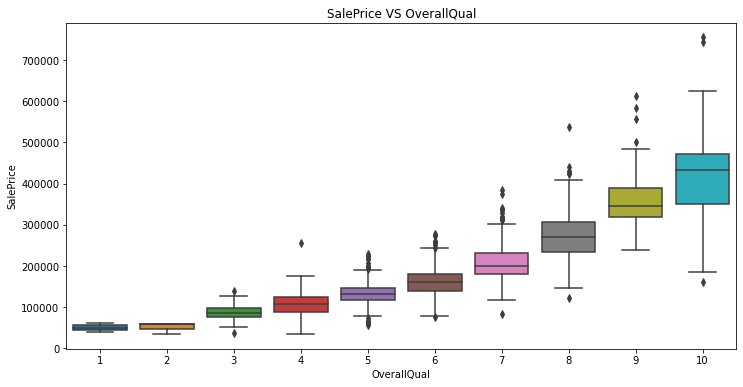

In [17]:
#OverallQual Vs Saleprice


F, ax = plt.subplots(figsize =(12,6))
fig = sns.boxplot(data = Data_df, x = 'OverallQual', y= 'SalePrice').set_title('SalePrice VS OverallQual')


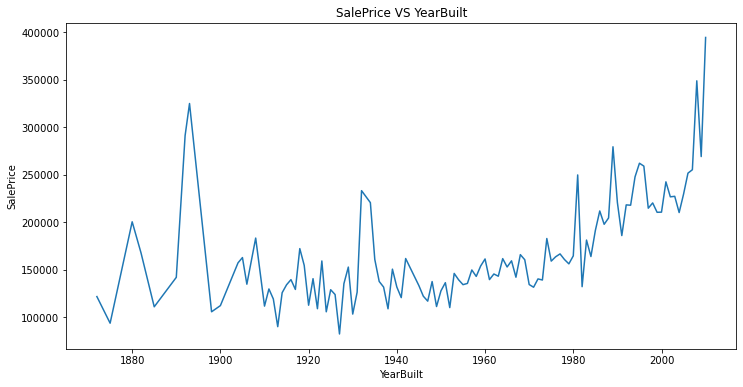

In [18]:
# yearbuilt vs Salesprice

F, ax = plt.subplots(figsize =(12,6))
fig = sns.lineplot(data = Data_df, x = 'YearBuilt', y = 'SalePrice', ci = None).set_title('SalePrice VS YearBuilt')

In conclusion, Houses built more recently will increase a house's selling price more than old houses. The overall quality(material & finished quality) of a house is the most important feature for determining house price. Grade living area is also an import predictor of house price